<a href="https://colab.research.google.com/github/kszymon/machine-learning-bootcamp/blob/main/unsupervised%20/05_case_studies/02_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### OpenCV
Strona biblioteki: [https://opencv.org/](https://opencv.org/)  

Dokumentacja: [https://docs.opencv.org/](https://docs.opencv.org/)

Podstawowa biblioteka do Computer Vision w języku Python.

Aby zainstalować bibliotekę OpenCV, użyj polecenia poniżej:
```
!pip install opencv-python
```
Aby zaktualizować do najnowszej wersji użyj polecenia poniżej:
```
!pip install --upgrade opencv-python
```
Kurs stworzony w oparciu o wersję `4.1.2`

### Spis treści:
1. [Import bibliotek](#0)
2. [Pobranie obrazów](#1)
3. [Eksploracja](#2)
4. [KMeans](#3)

### <a name='0'></a> Import bibliotek

In [11]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

### <a name='1'></a> Pobranie obrazów

In [12]:
!wget https://storage.googleapis.com/esmartdata-courses-files/ml-course/green.jpg
!wget https://storage.googleapis.com/esmartdata-courses-files/ml-course/ski.jpg
!wget https://storage.googleapis.com/esmartdata-courses-files/ml-course/view.jpg

--2025-01-01 17:14:45--  https://storage.googleapis.com/esmartdata-courses-files/ml-course/green.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.207, 173.194.217.207, 108.177.11.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12300 (12K) [image/jpeg]
Saving to: ‘green.jpg.1’

green.jpg.1         100%[===================>]  12.01K  --.-KB/s    in 0s      

2025-01-01 17:14:46 (85.0 MB/s) - ‘green.jpg.1’ saved [12300/12300]

--2025-01-01 17:14:46--  https://storage.googleapis.com/esmartdata-courses-files/ml-course/ski.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.207, 173.194.217.207, 108.177.11.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71376 (70K) [image/jpeg]
Saving to: ‘ski.jpg.1’

ski.jpg.1       

### <a name='2'></a> Eksploracja

In [13]:
img = cv2.imread('ski.jpg')
img.shape

(460, 600, 3)

array([[[143, 100,  67],
        [143, 100,  67],
        [144, 101,  68],
        ...,
        [135,  95,  66],
        [132,  92,  63],
        [131,  91,  62]],

       [[144, 101,  68],
        [145, 102,  69],
        [145, 102,  69],
        ...,
        [133,  93,  64],
        [131,  91,  62],
        [129,  89,  60]],

       [[146, 103,  70],
        [146, 103,  70],
        [146, 103,  70],
        ...,
        [131,  93,  63],
        [130,  91,  63],
        [129,  90,  62]],

       ...,

       [[244, 244, 244],
        [246, 246, 246],
        [246, 246, 246],
        ...,
        [233, 233, 233],
        [237, 235, 235],
        [239, 237, 237]],

       [[244, 244, 244],
        [246, 246, 246],
        [248, 248, 248],
        ...,
        [233, 233, 233],
        [236, 236, 236],
        [240, 240, 240]],

       [[245, 245, 245],
        [247, 247, 247],
        [249, 249, 249],
        ...,
        [233, 233, 233],
        [237, 237, 237],
        [241, 241, 241]]], dtype=uint8)
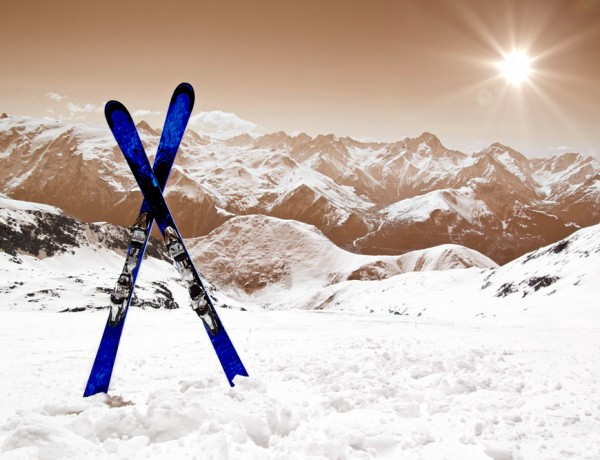

In [14]:
img

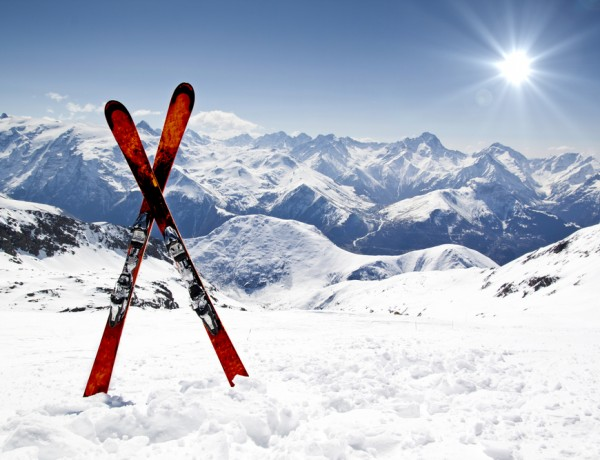

In [15]:
cv2_imshow(img)

In [16]:
# przygotowanie obrazu do modelu
img_data = img.reshape((-1, 3))
img_data = np.float32(img_data)
img_data.shape

(276000, 3)

In [17]:
df = pd.DataFrame(img_data, columns=['dim1','dim2', 'dim3'])
df.head()

,dim1,dim2,dim3
0,143.0,100.0,67.0
1,143.0,100.0,67.0
2,144.0,101.0,68.0
3,144.0,101.0,68.0
4,144.0,101.0,68.0


### <a name='3'></a> KMeans



In [18]:
cv2.kmeans?

https://docs.opencv.org/master/d1/d5c/tutorial_py_kmeans_opencv.html

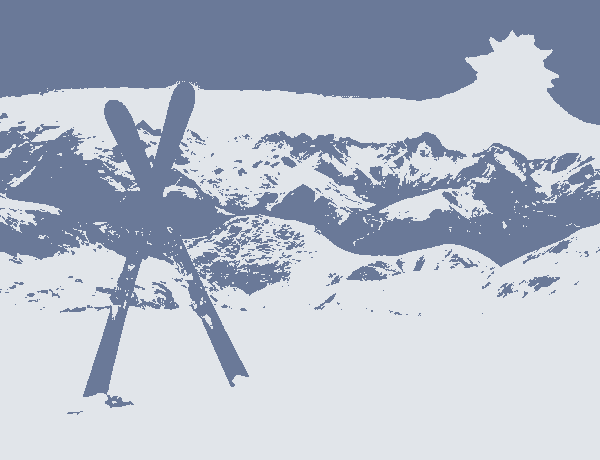

In [19]:
_, label, center = cv2.kmeans(
    data=img_data,  # float32 data type
    K=2,            # liczba klastrów
    bestLabels=None,
    criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),  # kryterium zatrzymania (typ, max_iter, eps)
    attempts=10,    # liczba uruchomień algorytmu
    flags=cv2.KMEANS_RANDOM_CENTERS)    # określenie inicjalizacji centroidów

center = np.uint8(center)
res = center[label.flatten()]
res = res.reshape((img.shape))
cv2_imshow(res)

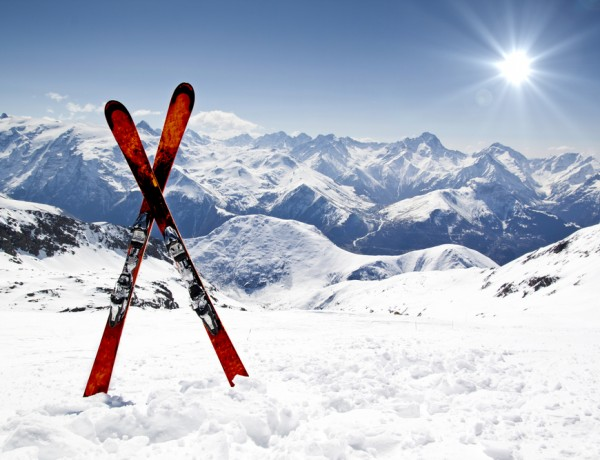

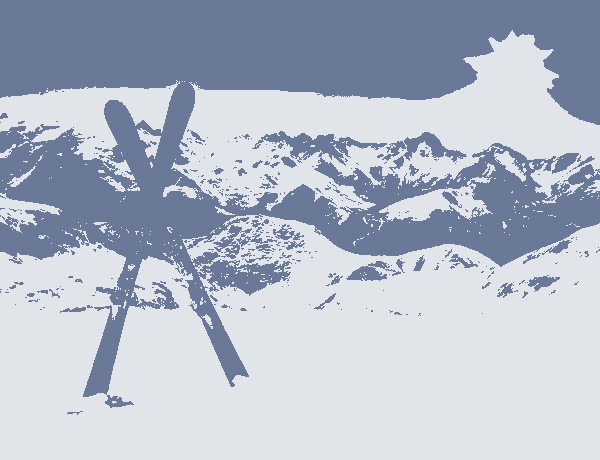

In [23]:
def make_kmeans(n_neighbor=2, img_name='ski.jpg'):

    # wczytanie zdjęcia
    img = cv2.imread(img_name)
    cv2_imshow(img)

    # przygotowanie zdjęcia
    img_data = img.reshape((-1, 3))
    img_data = np.float32(img_data)

    # kmeans
    _, label, center = cv2.kmeans(
        data=img_data,
        K=2,
        bestLabels=None,
        criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),
        attempts=10,
        flags=cv2.KMEANS_RANDOM_CENTERS)

    # przygotowanie do wyświetlenia
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape((img.shape))
    cv2_imshow(res)

make_kmeans()

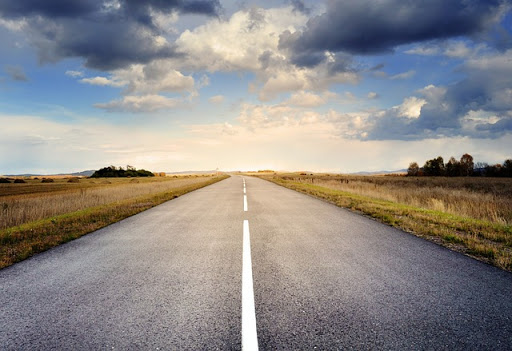

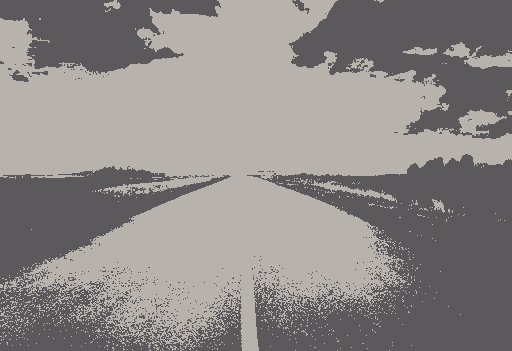

In [29]:
make_kmeans(3, img_name='view.jpg')

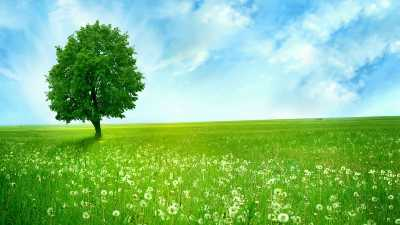

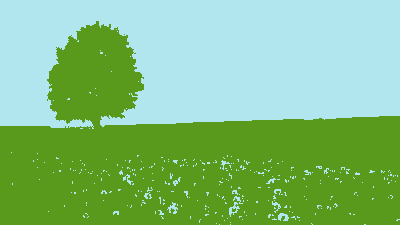

In [25]:
make_kmeans(3, img_name='green.jpg')